In [1]:
# Libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [2]:
# Helper Methods
def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [3]:
# Data preparation
X, y = make_blobs(
    centers=3, n_samples=1000, n_features=2, shuffle=True, random_state=42
)
print(X.shape)
n_clusters = len(np.unique(y))
print(n_clusters)

(1000, 2)
3


In [4]:
class KMeans:
    def __init__(self, n_clusters=5, max_iters=100, plot_steps=False):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.n_clusters)]
        self.centroids = []

    def _create_clusters(self, centroids):
        # assign samples to clost centroids to create clusters
        clusters = [[] for _ in range(self.n_clusters)]
        for idx, sample in enumerate(self.X):
            # index of closest centroid
            centroid_idx = self._closest_centroid(sample, centroids)
            # add current sample to the cluster with nearest centroid
            clusters[centroid_idx].append(idx)
        return clusters

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)

        # maps each cluster's index as a sample's label
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
                
    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.n_clusters, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = mean
        return centroids  

    def _closest_centroid(self, sample, centroids):
        dist = [euclidean_dist(sample, point) for point in centroids]
        closest_idx = np.argmin(dist) # closest centroid to sample
        return closest_idx

    def _is_converged(self, old_centroids, centroids):
        distances = [
            euclidean_dist(old_centroids[i], centroids[i]) for i in range(self.n_clusters)
        ]
        # convergence detected when no centroids have changed
        return sum(distances) == 0
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # pick initial centroids from data
        random_idxs = np.random.choice(self.n_samples, self.n_clusters, replace=False)
        self.centroids = [X[idx] for idx in random_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()
            
            # Calculate new centroids using the clusters
            centroid_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # Check for convergence
            if self._is_converged(centroid_old, self.centroids):
                break

        return self._get_cluster_labels(self.clusters)
    
    def plot(self):
        _, ax = plt.subplots(figsize=(12, 8))

        for _, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

3


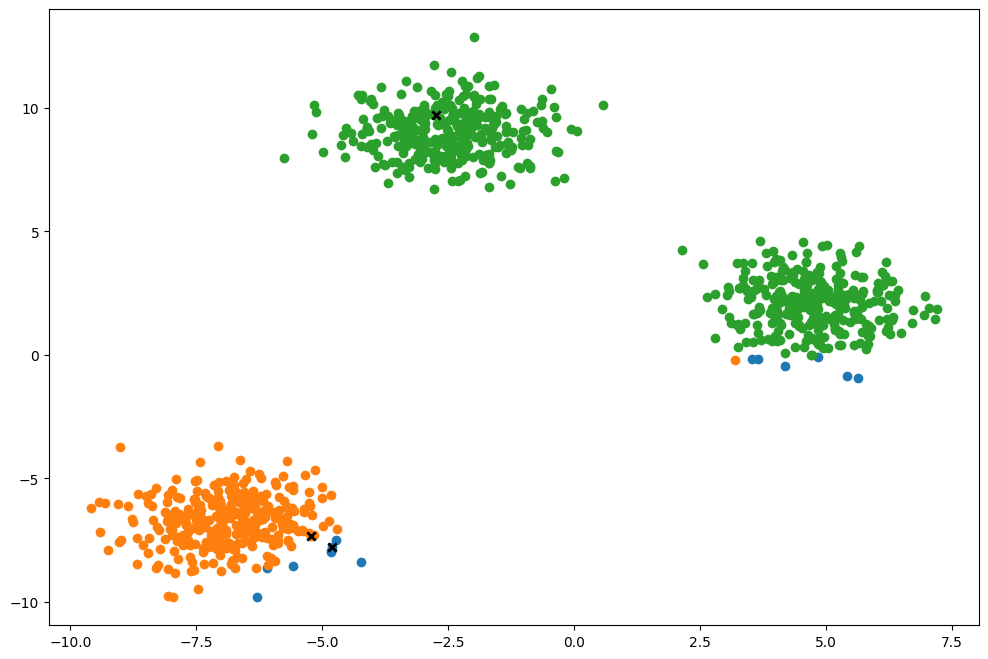

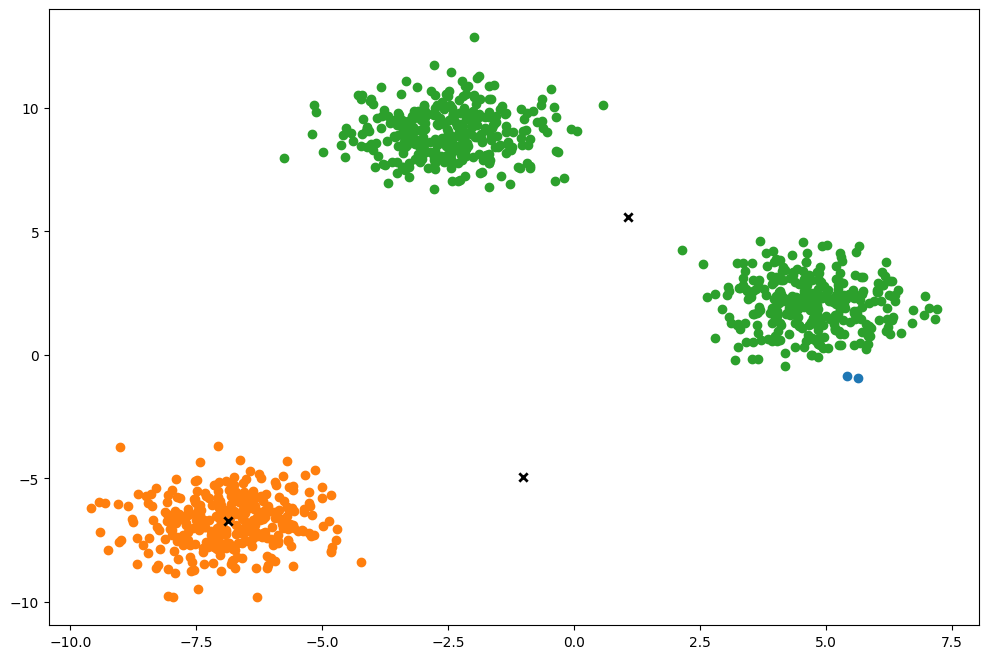

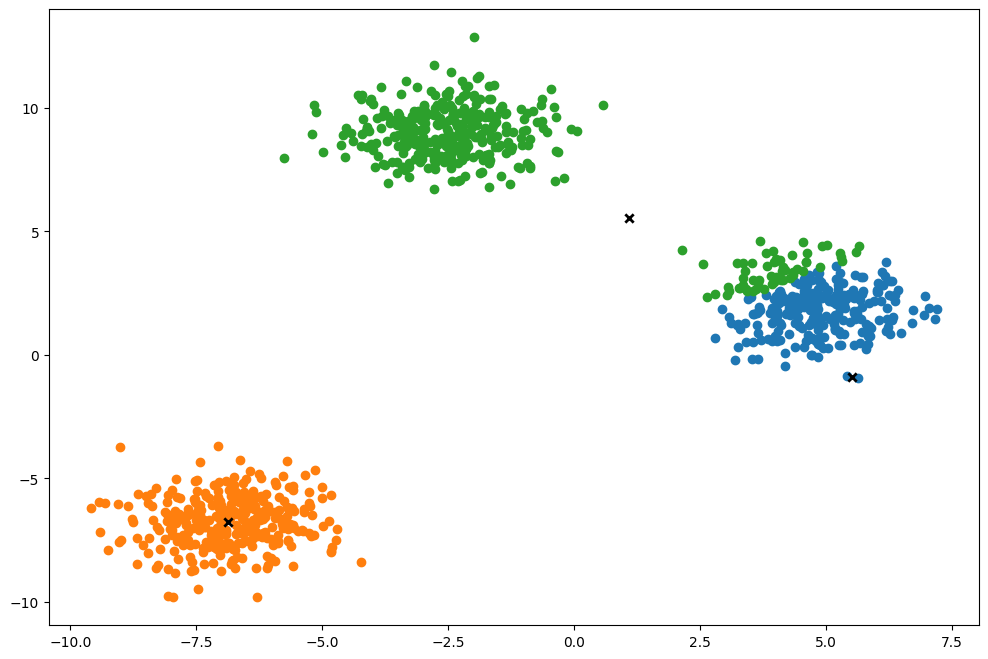

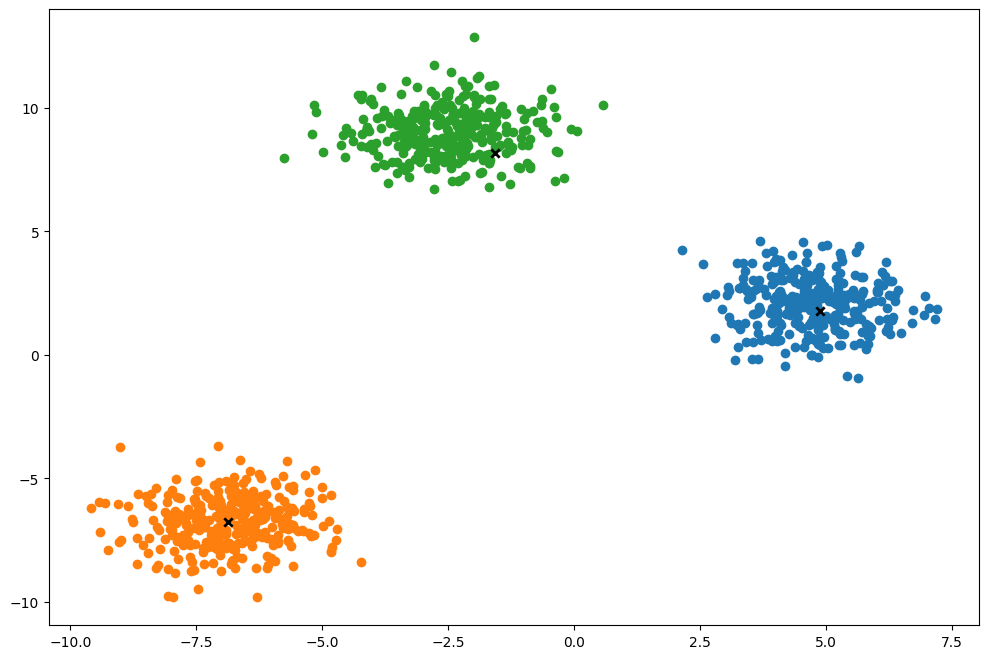

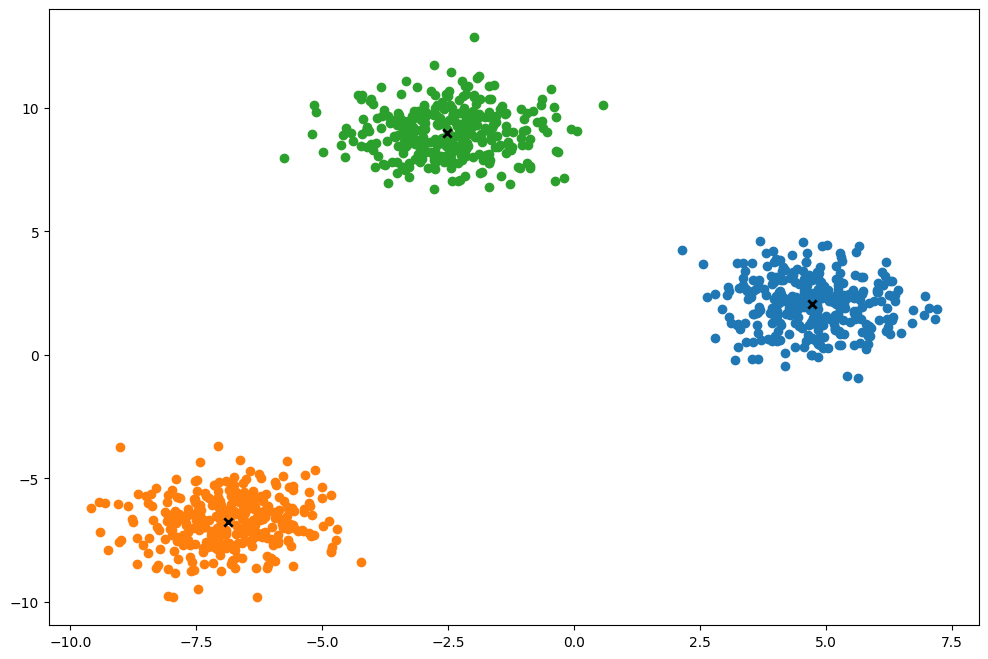

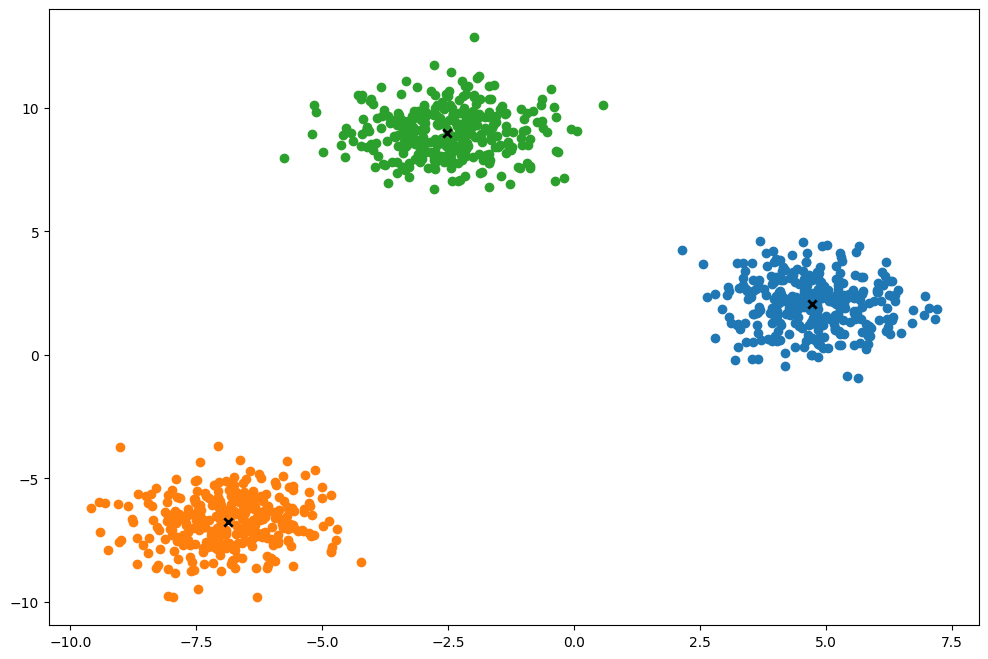

In [5]:
clusters = len(np.unique(y))
print(clusters)

k = KMeans(n_clusters=clusters, max_iters=150, plot_steps=True)
y_pred = k.predict(X)

k.plot()